# HW#4
2014-1986 정현재

In [4]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd

# 1. N차 interpolation polynomial $ \begin{equation}f(x) = \sin{x}\end{equation} $


In [2]:
n = 10
X = np.arange(n+1)
X = X*math.pi/n
Y = np.sin(X)

(1) inverse matrix를 이용하는 방법

f(x) = 0.0 + 1.0000001070544968*x^1 + -1.0619060333283414e-06*x^2 + -0.16666225179574212*x^3 + -1.0312318863725523e-05*x^4 + 0.008348522594246788*x^5 + -1.49143839394128e-05*x^6 + -0.00018841161204363743*x^7 + -4.582665482644188e-06*x^8 + 4.154153092628121e-06*x^9 + -2.6446159773207967e-07*x^10

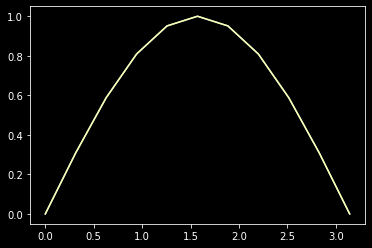

(array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265]),
 array([ 0.00000000e+00,  1.00000011e+00, -1.06190603e-06, -1.66662252e-01,
        -1.03123189e-05,  8.34852259e-03, -1.49143839e-05, -1.88411612e-04,
        -4.58266548e-06,  4.15415309e-06, -2.64461598e-07]))

In [3]:
def problem_1_1(n,X,Y):
    matA = np.ones((n+1,n+1))
    for i in range(n+1):
        matA[:,i] = X**i
    invA = np.linalg.inv(matA)
    p = invA.dot(Y)
    print('f(x) = ', end = '')
    print(p[0], end = '')
    degree = 0
    for x in p[1:]:
        degree += 1
        print(' + {0}*x^{1}'.format(x,degree), end = '')
    XX = np.tile(X, (n+1,1)).T
    XX[:,0] = 1
    XX = np.cumprod(XX, axis =1)
    Z = XX.dot(p)
    plt.plot(X, Z)
    plt.plot(X, Y)
    plt.show()
    return X, p
problem_1_1(n,X,Y)


Method 2 : Lagrange interpolation

f(x) = 0.0 + 1.0000001067044015*x^1 + -1.0609144052153852e-06*x^2 + -0.16666225253219835*x^3 + -1.031202633328121e-05*x^4 + 0.008348522510118528*x^5 + -1.4914362090223676e-05*x^6 + -0.0001884116163211047*x^7 + -4.582664775654166e-06*x^8 + 4.154152992041915e-06*x^9 + -2.6446159101523037e-07*x^10

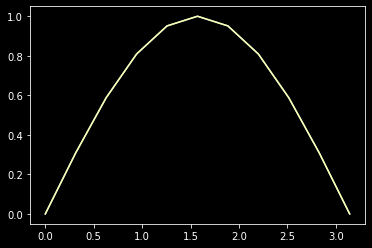

(array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265]),
 array([ 0.00000000e+00,  1.00000011e+00, -1.06091441e-06, -1.66662253e-01,
        -1.03120263e-05,  8.34852251e-03, -1.49143621e-05, -1.88411616e-04,
        -4.58266478e-06,  4.15415299e-06, -2.64461591e-07]))

In [4]:
def problem_1_2(n,X,Y):
    p = np.zeros(n+1)

    for i in range(n):
        A = X - X[i]
        ld = np.prod(A[A != 0])
        lu = np.ones(1)
        for j in X[A!=0]:
            lu = np.convolve(lu,np.array([-j, 1]))
        li = lu*Y[i]/ld
        p += li

    print('f(x) = ', end = '')
    print(p[0], end = '')
    degree = 0
    for x in p[1:n+1]:
        degree += 1
        print(' + {0}*x^{1}'.format(x,degree), end = '')

    XX = np.tile(X, (n+1,1)).T
    XX[:,0] = 1
    XX = np.cumprod(XX, axis =1)
    Z = XX.dot(p)
    plt.plot(X, Y, c = 'r')
    plt.plot(X, Z, c = 'b')
    plt.show()
    return X, p

problem_1_2(n,X,Y)

Method 3 : Newton interpolation

0.9424777960769379
f(x) = 0.0 + 1.0000001067044644*x^1 + -1.0609145057060425e-06*x^2 + -0.16666225252943073*x^3 + -1.0312029729140162e-05*x^4 + 0.008348522514652165*x^5 + -1.4914362875995514e-05*x^6 + -0.0001884116169583408*x^7 + -4.582664706067513e-06*x^8 + 4.154152994178112e-06*x^9 + -2.6446159333269764e-07*x^10

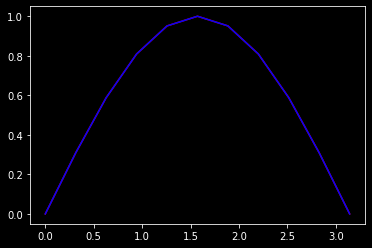

(array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265]),
 array([ 0.00000000e+00,  1.00000011e+00, -1.06091451e-06, -1.66662253e-01,
        -1.03120297e-05,  8.34852251e-03, -1.49143629e-05, -1.88411617e-04,
        -4.58266471e-06,  4.15415299e-06, -2.64461593e-07]))

In [6]:
def problem_1_3(n,X,Y):
    p = np.zeros(n+1)

    fmat = np.zeros((n+1,n+1))
    fmat[0] = Y

    Xchgmat = np.tile(X,(n+1,1)).T - np.tile(X,(n+1,1))
    print(X[3] - X[0])
    for i in range(1,n+1):
        fmat[i, i:] = (fmat[i-1, i:] - fmat[i-1, i-1:-1])/np.diag(Xchgmat, k = -i)

    for i in range(n+1):
        fi = np.diag(fmat)[i]
        gi = g(n,i)
        p += fi*gi

    print('f(x) = ', end = '')
    print(p[0], end = '')
    degree = 0

    for x in p[1:n+1]:
        degree += 1
        print(' + {0}*x^{1}'.format(x,degree), end = '')
    # 결과값 plot
    plt.show()   
    XX = np.tile(X, (n+1,1))
    XX[0] = 1
    XX = np.cumprod(XX,axis = 0)
    Z = p.dot(XX)
    plt.plot(X, Y, c = 'r')
    plt.plot(X, Z, c = 'b')
    plt.show()
    
    return X, p

def g(n,i):
    template = np.zeros(n+1)
    template[0] = 1

    for j in range(i):
        template = np.convolve(template,np.array([-X[j],1]))
        template = template[:n+1]
    return template

problem_1_3(n,X,Y)

# 2. N차 Polynomail interpolation $ \begin{equation} f({x}) = \frac{1}{1+x^2} \end{equation} $



In [7]:
n = 40 # 문제에서는 n = 50을 사용하길 바랐지만, 소숫점 계산의 한계로 40을 사용함
f2 = lambda x: 1/(1+x**2)
f2 = np.vectorize(f2)

(1) 일반 node

f(x) = 1.0000000000000002 + 4.041228072668157e-16*x^1 + -0.9998096676809105*x^2 + -2.4774019641293776e-16*x^3 + 0.9949488444511408*x^4 + -3.3133218391157016e-15*x^5 + -0.9592467036055404*x^6 + -9.901801600875615e-15*x^7 + 0.8398661550314901*x^8 + 7.840950111415168e-16*x^9 + -0.6179269486582794*x^10 + -6.716849298982197e-15*x^11 + 0.3614043511168671*x^12 + -1.3877787807814457e-16*x^13 + -0.16359407629795045*x^14 + 1.0946105133413653e-14*x^15 + 0.05685633153059022*x^16 + 6.146992637123816e-15*x^17 + -0.015182058203199709*x^18 + 1.2398936044544229e-15*x^19 + 0.0031254614431258216*x^20 + 1.0576392192596096e-16*x^21 + -0.0004975776745256883*x^22 + 3.699839913606784e-18*x^23 + 6.132291886292456e-05*x^24 + 3.8963515573697816e-20*x^25 + -5.838362153463174e-06*x^26 + 0.0*x^27 + 4.2669562243758736e-07*x^28 + 0.0*x^29 + -2.3650970215024718e-08*x^30 + 0.0*x^31 + 9.740552000240515e-10*x^32 + 0.0*x^33 + -2.881372779281327e-11*x^34 + 4.0389678347315804e-28*x^35 + 5.775409427036226e-13*x^36 + 0.0*x^37

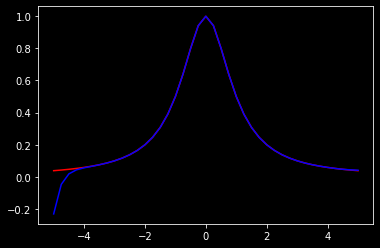

(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75,  5.  ]),
 array([ 1.00000000e+00,  4.04122807e-16, -9.99809668e-01, -2.47740196e-16,
         9.94948844e-01, -3.31332184e-15, -9.59246704e-01, -9.90180160e-15,
         8.39866155e-01,  7.84095011e-16, -6.17926949e-01, -6.71684930e-15,
         3.61404351e-01, -1.38777878e-16, -1.63594076e-01,  1.09461051e-14,
         5.68563315e-02,  6.14699264e-15, -1.51820582e-02,  1.23989360e-15,
         3.12546144e-03,  1.05763922e-16, -4.97577675e-04,  3.69983991e-18,
         6.13229189e-05,  3.89635156e-20, -5.83836215e-06,  0.00000000e+00,
         4.26695622e-07,  0.00000000e+00, -2.36509702e-08,  0.00000000e+00,
         9.74055200e-10,  0.00000000e+00, -2.88137278e-11,  4.0

In [8]:
X = np.linspace(-5,5,num=n+1)
Y = f2(X)

def problem_2_1(n,X,Y):
    p = np.zeros(n+1)

    fmat = np.zeros((n+1,n+1))
    fmat[0] = Y

    Xchgmat = np.tile(X,(n+1,1)).T - np.tile(X,(n+1,1))

    for i in range(1,n+1):
        fmat[i, i:] = (fmat[i-1, i:] - fmat[i-1, i-1:-1])/np.diag(Xchgmat, k = -i)

    for i in range(n+1):
        fi = np.diag(fmat)[i]
        gi = g(n,i)
        p += fi*gi

    # 획득한 다항식 출력
    print('f(x) = ', end = '')
    print(p[0], end = '')
    degree = 0
    for x in p[1:n+1]:
        degree += 1
        print(' + {0}*x^{1}'.format(x,degree), end = '')
    
    # 결과값 plot
    XX = np.tile(X, (n+1,1)).T
    XX[:,0] = 1
    XX = np.cumprod(XX, axis =1)
    Z = XX.dot(p)
    plt.plot(X, Y, c = 'r')
    plt.plot(X, Z, c = 'b')
    plt.show()   
    return X, p

def g(n,i):
    template = np.zeros(n+1)
    template[0] = 1

    for j in range(i):
        template = np.convolve(template,np.array([-X[j],1]))
        template = template[:n+1]
    return template
problem_2_1(n,X,Y)

(2) Chevyshev node

f(x) = 1.0000000000000002 + -1.7336392738043216e-16*x^1 + -0.9952471607634663*x^2 + -3.361894096443052e-15*x^3 + 0.9420153613143116*x^4 + 1.6167622796103842e-15*x^5 + -0.7640082239562962*x^6 + -4.371503159461554e-15*x^7 + 0.48326553875165384*x^8 + -4.503342143635791e-15*x^9 + -0.22872550416613435*x^10 + -3.599551212651875e-14*x^11 + 0.08062948404358374*x^12 + -4.470382397592232e-15*x^13 + -0.021391075994597164*x^14 + 1.6056166812772332e-14*x^15 + 0.004330414476508782*x^16 + 6.62761946018664e-15*x^17 + -0.0006774257749686207*x^18 + 6.573788822322735e-16*x^19 + 8.269357935448911e-05*x^20 + -4.733558922435932e-17*x^21 + -7.9272461912174e-06*x^22 + -1.3684452537603663e-17*x^23 + 5.98372426560859e-07*x^24 + -1.0179880188118597e-18*x^25 + -3.551492144251418e-08*x^26 + -3.281508208059116e-20*x^27 + 1.6472561768033474e-09*x^28 + -3.905326467015982e-22*x^29 + -5.897946090805809e-11*x^30 + 2.5364718002114325e-25*x^31 + 1.5965602045711252e-12*x^32 + 2.096476741715361e-26*x^33 + -3.157200356732109

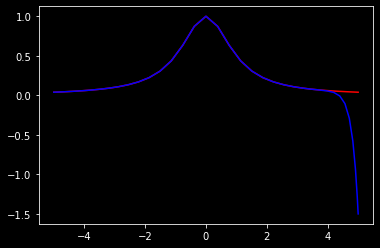

(array([ 4.99633091e+00,  4.96701045e+00,  4.90854160e+00,  4.82126748e+00,
         4.70570024e+00,  4.56251808e+00,  4.39256125e+00,  4.19682713e+00,
         3.97646436e+00,  3.73276611e+00,  3.46716250e+00,  3.18121221e+00,
         2.87659330e+00,  2.55509340e+00,  2.21859919e+00,  1.86908536e+00,
         1.50860299e+00,  1.13926754e+00,  7.63246421e-01,  3.82746264e-01,
         3.06161700e-16, -3.82746264e-01, -7.63246421e-01, -1.13926754e+00,
        -1.50860299e+00, -1.86908536e+00, -2.21859919e+00, -2.55509340e+00,
        -2.87659330e+00, -3.18121221e+00, -3.46716250e+00, -3.73276611e+00,
        -3.97646436e+00, -4.19682713e+00, -4.39256125e+00, -4.56251808e+00,
        -4.70570024e+00, -4.82126748e+00, -4.90854160e+00, -4.96701045e+00,
        -4.99633091e+00]),
 array([ 1.00000000e+00, -1.73363927e-16, -9.95247161e-01, -3.36189410e-15,
         9.42015361e-01,  1.61676228e-15, -7.64008224e-01, -4.37150316e-15,
         4.83265539e-01, -4.50334214e-15, -2.28725504e-01, -3

In [9]:
X = 5*np.cos(np.linspace(np.pi/(2*n+2),(2*n+1)*np.pi/(2*n+2), num = n+1))
Y = f2(X)

def problem_2_2(n,X,Y):
    p = np.zeros(n+1)

    fmat = np.zeros((n+1,n+1))
    fmat[0] = Y

    Xchgmat = np.tile(X,(n+1,1)).T - np.tile(X,(n+1,1))

    for i in range(1,n+1):
        fmat[i, i:] = (fmat[i-1, i:] - fmat[i-1, i-1:-1])/np.diag(Xchgmat, k = -i)

    for i in range(n+1):
        fi = np.diag(fmat)[i]
        gi = g(n,i)
        p += fi*gi

    # 획득한 다항식 출력
    print('f(x) = ', end = '')
    print(p[0], end = '')
    degree = 0
    for x in p[1:n+1]:
        degree += 1
        print(' + {0}*x^{1}'.format(x,degree), end = '')
    
    # 결과값 plot
    XX = np.tile(X, (n+1,1))
    XX[0] = 1
    XX = np.cumprod(XX,axis = 0)
    Z = p.dot(XX)
    plt.plot(X, Y, c = 'r')
    plt.plot(X, Z, c = 'b')
    plt.show()   
    return X, p

def g(n,i):
    template = np.zeros(n+1)
    template[0] = 1

    for j in range(i):
        template = np.convolve(template,np.array([-X[j],1]))
        template = template[:n+1]
    return template
problem_2_2(n,X,Y)

# 3. Pandas 활용

(1) 1880년부터 2018년까지의 데이터를 한DataFrame으로만들기

In [5]:
years = range(1880, 2019)
samples = []
for year in years:
    sample = pd.read_csv('HW4/names/yob{}.txt'.format(year), names = ['name', 'sex', 'births'])
    sample['year'] = year
    samples.append(sample)

fulldata = pd.concat(samples, ignore_index=True)

grouped = fulldata.groupby(['sex'])


def get_top5(group):
    return group.sort_values(by='births', ascending=False)[:5]

top5 = grouped.apply(get_top5)

top5.reset_index(inplace=True, drop=True)

top5

,name,sex,births,year
0,Linda,F,99689,1947
1,Linda,F,96211,1948
2,Linda,F,91016,1949
3,Linda,F,80431,1950
4,Mary,F,73985,1921
5,James,M,94757,1947
6,Michael,M,92704,1957
7,Robert,M,91640,1947
8,Michael,M,90656,1956
9,Michael,M,90517,1958


(2) 상대적 비율에 대하여 실행

In [11]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

fulldata = fulldata.groupby(['year','sex']).apply(add_prop)

grouped = fulldata.groupby(['sex'])

def get_top5_2(group):
    return group.sort_values(by='prop', ascending=False)[:5]

top5_2 = grouped.apply(get_top5_2)
top5_2.reset_index(inplace=True, drop=True)

top5_2



,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Mary,F,8148,1882,0.075551
2,Mary,F,6919,1881,0.075245
3,Mary,F,9217,1884,0.071439
4,Mary,F,8012,1883,0.071333
5,John,M,9655,1880,0.087383
6,John,M,8769,1881,0.087043
7,William,M,9532,1880,0.086270
8,John,M,8894,1883,0.085008
9,William,M,8524,1881,0.084611


(3) 20년단위

In [8]:
fulldata['20years'] = ((fulldata.year.values.astype(int)//20)*20).astype(str)
grouped = fulldata.groupby(['20years','sex','name'])
years_data = grouped[['births']].apply(sum)
years_data.reset_index(inplace = True, drop = False)
years_data

,20years,sex,name,births
0,1880,F,Abbie,2062
1,1880,F,Abby,121
2,1880,F,Abelina,5
3,1880,F,Abigail,261
4,1880,F,Achsa,12
...,...,...,...,...
231363,2000,M,Zyus,11
231364,2000,M,Zyvion,5
231365,2000,M,Zyvon,7
231366,2000,M,Zyyon,6


In [33]:
#(1)과 같은 방법으로 분석
grouped = years_data.groupby(['20years','sex'])
def get_top5(group):
    return group.sort_values(by='births', ascending=False)[:5]
top5 = grouped.apply(get_top5)
top5.reset_index(inplace=True, drop=True)
top5

,20years,sex,name,births
0,1880,F,Mary,222804
1,1880,F,Anna,93420
2,1880,F,Margaret,59736
3,1880,F,Elizabeth,58885
4,1880,F,Emma,54056
...,...,...,...,...
65,2000,M,Jacob,425864
66,2000,M,Michael,384597
67,2000,M,William,340194
68,2000,M,Ethan,339287


In [37]:
# (2)와 같은 방법으로 분석
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
years_data = years_data.groupby(['20years','sex']).apply(add_prop)

grouped = years_data.groupby(['20years','sex'])
def get_top5_2(group):
    return group.sort_values(by='prop', ascending=False)[:5]

top5_2 = grouped.apply(get_top5_2)
top5_2.reset_index(inplace=True, drop=True)

top5_2


,20years,sex,name,births,prop
0,1880,F,Mary,222804,0.063041
1,1880,F,Anna,93420,0.026433
2,1880,F,Margaret,59736,0.016902
3,1880,F,Elizabeth,58885,0.016661
4,1880,F,Emma,54056,0.015295
...,...,...,...,...,...
65,2000,M,Jacob,425864,0.011539
66,2000,M,Michael,384597,0.010421
67,2000,M,William,340194,0.009218
68,2000,M,Ethan,339287,0.009194
